# Самостоятельный проект | ГлавРосГосНефть

## Описание проекта <a id='0'> </a>

**Заказчик**: нефтедобывающая компания «ГлавРосГосНефть»

**Цель проекта**: определить, где бурить новые скважины

**Задача проекта №1**: построить модель для определения региона, где добыча принесёт наибольшую прибыль 

**Задача проекта №2**: проанализируйте возможную прибыль и риски техникой Bootstrap

**План проекта**:

- [Описание и загрузка данных](#1)
- [Изучение и предобработка данных](#2)
- [Исследовательский и корреляционный анализ данных](#3)
- [Обучение и проверка модели](#4)
- [Расчет прибыли и рисков](#5)
- [Общий вывод](#6)

## Описание и загрузка данных <a id ='1'>  </a>

In [1]:
!pip install --upgrade seaborn -q

import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

Предоставленные данные включают характеристики скважин в трёх регионах:
- `/datasets/geo_data_0.csv`;
- `/datasets/geo_data_1.csv`;
- `/datasets/geo_data_2.csv`.

Информация по скваженам представлена в разерезе следующих признаков:

- `id` — уникальный идентификатор скважины;
- `f0`, `f1`, `f2` — три значимых признака точек;
- `product` — объём запасов в скважине (тыс. баррелей).

Загрузим вышеуказанные данные:

In [2]:
def csv_reader(pth):
    if os.path.exists(pth):
        return pd.read_csv(pth)
    elif os.path.exists(os.path.join('/datasets', pth)):
        return pd.read_csv(os.path.join('/datasets', pth))
    
df1 = csv_reader('geo_data_0.csv')
df2 = csv_reader('geo_data_1.csv')
df3 = csv_reader('geo_data_2.csv')

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Данные описаны и загружены.
</div>

## Изучение и предобработка данных <a id ='2'>  </a>

Взглянем, используя функцию, на основную информацию о датафреймах:

In [3]:
def main_info_about_df(df):
    display(df.head())
    print('-----------------------------------------')
    display(df.info())
    print('-----------------------------------------')
    print('Размер таблицы: ', df.shape)
    print('-----------------------------------------')
    print('Количество явных дубликатов: ', df.drop(['id'], axis=1).duplicated().sum())
    print('-----------------------------------------')
    print('Количество пропусков в каждом столбце таблицы:')
    display(pd.DataFrame(df.isna().sum()))
    print('-----------------------------------------')
    print('Описательная статистика:')
    display(pd.DataFrame(df.describe()))

### Таблица 1

In [4]:
main_info_about_df(df1)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

-----------------------------------------
Размер таблицы:  (100000, 5)
-----------------------------------------
Количество явных дубликатов:  0
-----------------------------------------
Количество пропусков в каждом столбце таблицы:


,0
id,0
f0,0
f1,0
f2,0
product,0


-----------------------------------------
Описательная статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Посмотрим на уникальность индексов (идентификатор скважины) в первом регионе:

In [5]:
df1.id.value_counts().head(11)

id
fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
A5aEY    2
bsk9y    2
TtcGQ    2
HZww2    2
bxg6G    2
iAaqy    1
Name: count, dtype: int64

In [6]:
df1[df1['id'] == 'fiKDv']

,id,f0,f1,f2,product
16633,fiKDv,0.157341,1.028359,5.585586,95.817889
90815,fiKDv,0.049883,0.841313,6.394613,137.346586


### Таблица 2

In [7]:
main_info_about_df(df2)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

-----------------------------------------
Размер таблицы:  (100000, 5)
-----------------------------------------
Количество явных дубликатов:  0
-----------------------------------------
Количество пропусков в каждом столбце таблицы:


,0
id,0
f0,0
f1,0
f2,0
product,0


-----------------------------------------
Описательная статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Посмотрим на уникальность индексов (идентификатор скважины) во втором регионе:

In [8]:
df2.id.value_counts().head(5)

id
wt4Uk    2
LHZR0    2
5ltQ6    2
bfPNe    2
kBEdx    1
Name: count, dtype: int64

In [9]:
df2[df2['id'] == 'wt4Uk']

,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


### Таблица 3

In [10]:
main_info_about_df(df3)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

-----------------------------------------
Размер таблицы:  (100000, 5)
-----------------------------------------
Количество явных дубликатов:  0
-----------------------------------------
Количество пропусков в каждом столбце таблицы:


,0
id,0
f0,0
f1,0
f2,0
product,0


-----------------------------------------
Описательная статистика:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Посмотрим на уникальность индексов (идентификатор скважины) в третьем регионе:

In [11]:
df3.id.value_counts().head(5)

id
VF7Jo    2
KUPhW    2
xCHr8    2
Vcm5J    2
fwXo0    1
Name: count, dtype: int64

In [12]:
df3[df3['id'] == 'VF7Jo']

,id,f0,f1,f2,product
11449,VF7Jo,2.122656,-0.858275,5.746001,181.716817
49564,VF7Jo,-0.883115,0.560537,0.723601,136.233420


<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**
- Данные по каждому региону содержат записи о `10000` скважинах;
- Пропуски и дубликаты `отсутствуют`;
- Типы данных в `порядке`;
- `Предположительно` есть выбросы, судя по максимальным значениям;
- В данных по всем трём регионам присутсвут различные по наполнеинию записи по скважинам с `одинаковым уникальным идентификатором`. Возможно, при загрузке данных в датафреймы попали записи об одной и той же скважине, но за разный период, либо записям некоторых уникальных скважин присвоили идентификатор уже имеющихся скважин. Также возможно, скважины работают нестабильно, показывая разный результат.
</div>

## Исследовательский и корреляционный анализ данных <a id ='3'>  </a>

### Анализ статистических характеристик

Посмотрим на распределения значений параметров и основные статистические характеристики данных в данных:

#### Таблица 1

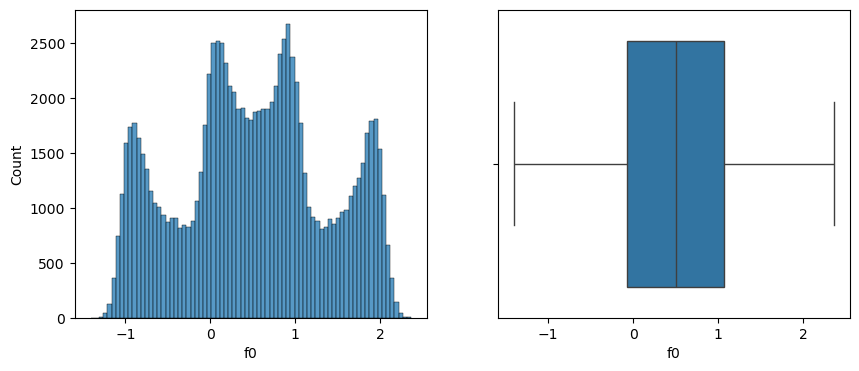

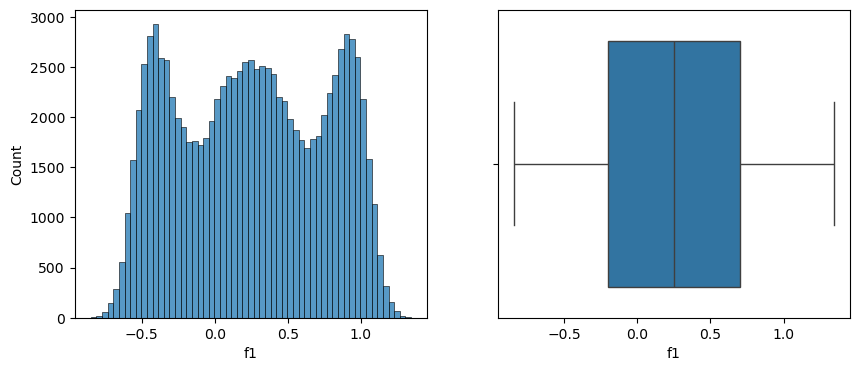

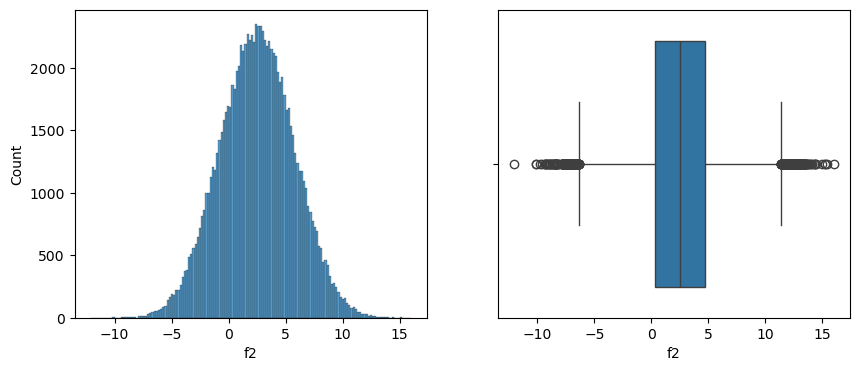

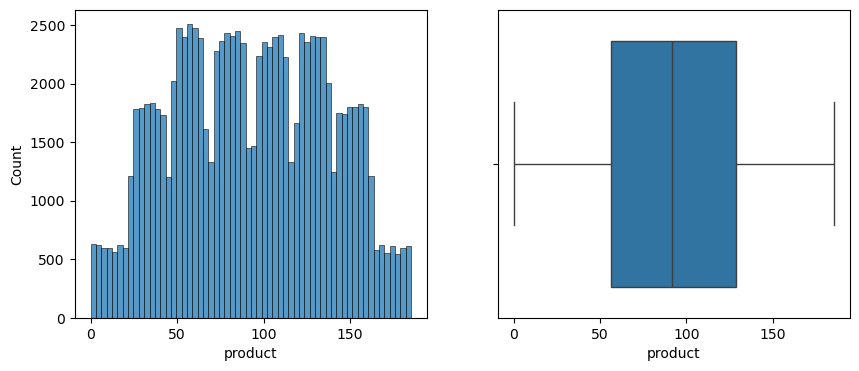

In [13]:
for num_column in list(df1.columns)[1:]:
    plt.rcParams['figure.figsize'] = 10, 4
    plt.subplot(1, 2, 1)
    sns.histplot(data=df1, x=num_column)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df1, x=num_column)
    plt.show()

In [14]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Заметим, что:
- в первом регионе значения признаков `f0`, `f1` и `product` `не имеют нормальное распределение`. `f2` `имеет вид нормального распреедления`;
- в значениях признака `f2` имеются `выбросы`;
- медианный и средний объем запасов в скважине `~92 тыс.` баррелей.

#### Таблица 2

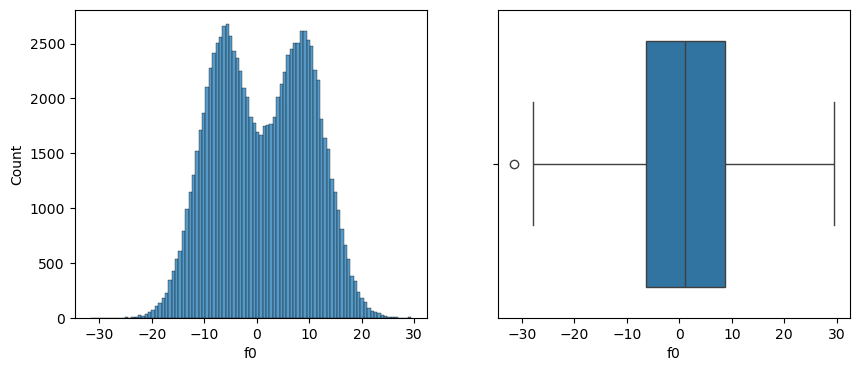

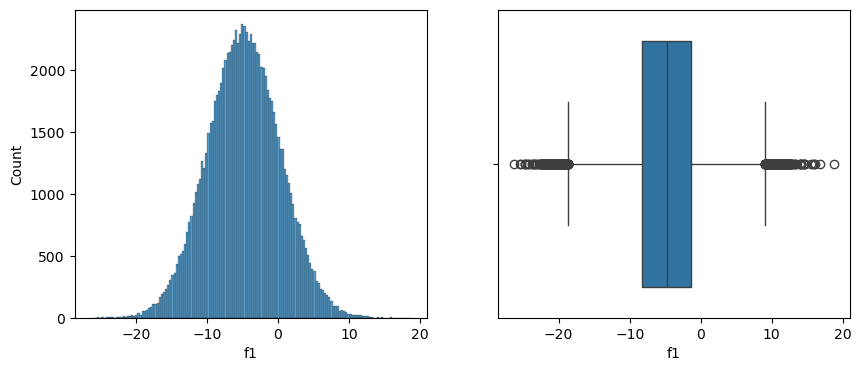

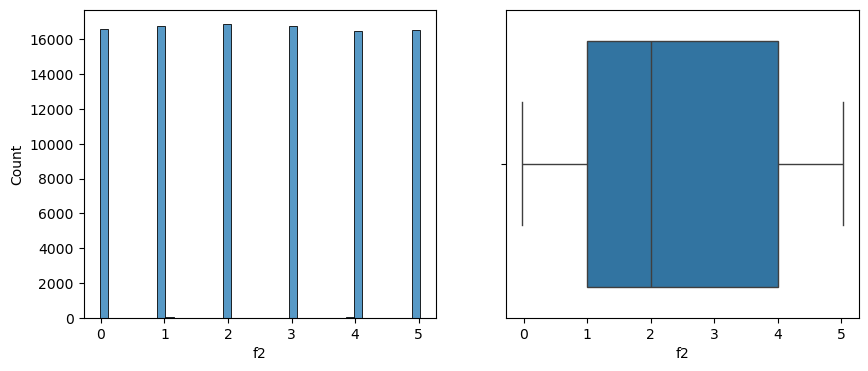

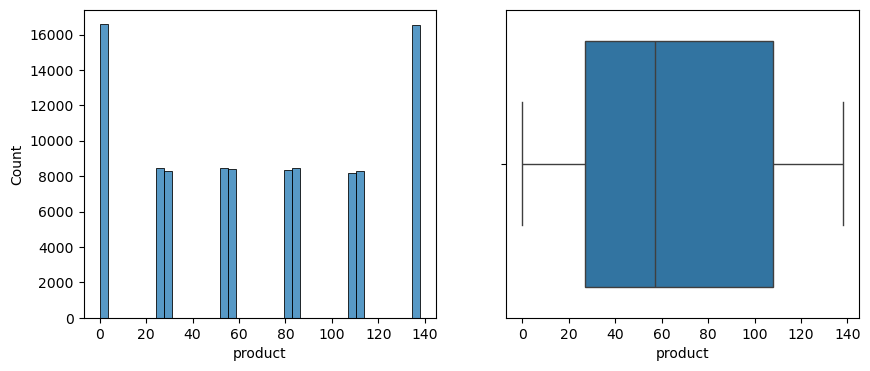

In [15]:
for num_column in list(df1.columns)[1:]:
    plt.rcParams['figure.figsize'] = 10, 4
    plt.subplot(1, 2, 1)
    sns.histplot(data=df2, x=num_column)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df2, x=num_column)
    plt.show()

In [16]:
df2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


**Заметим, что:**
- во втором регионе значения признаков `f0`, `f2` и `product` `не имеют нормальное распределение`. `f1` `имеет вид нормального распределения`;
- в значениях признака `f1` имеются `выбросы`;
- медианный объем запасов в скважине составляет `~57 тыс.` баррелей, средний - `~69 тыс.`.

#### Таблица 3

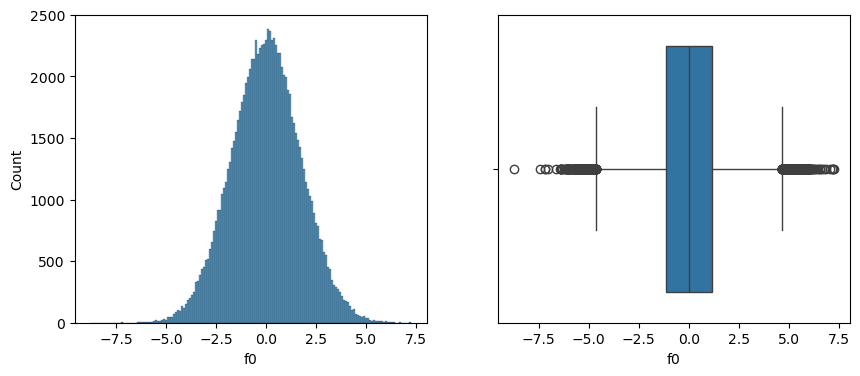

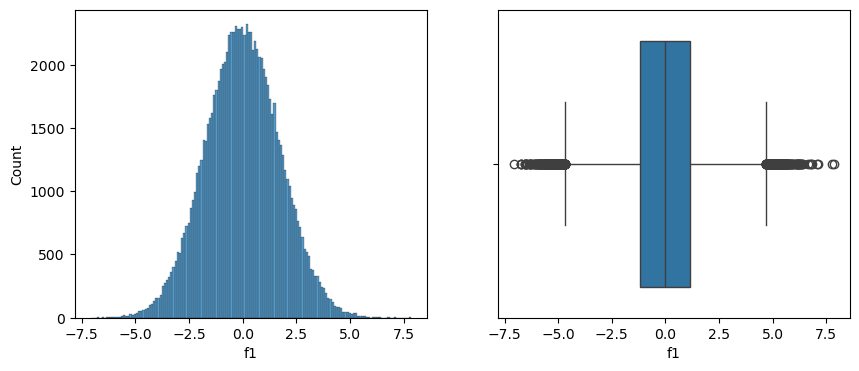

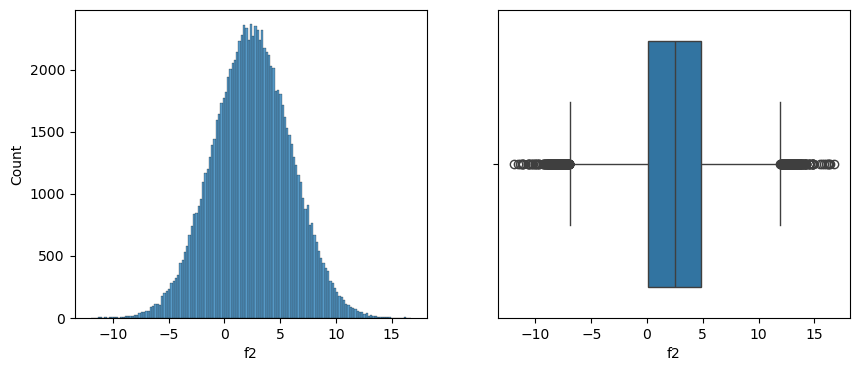

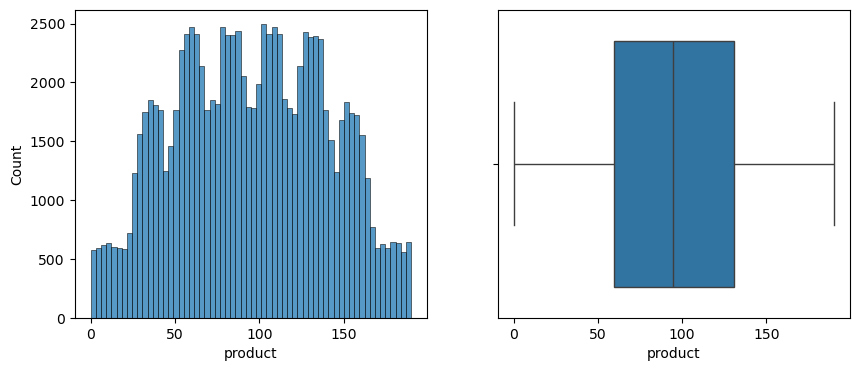

In [17]:
for num_column in list(df1.columns)[1:]:
    plt.rcParams['figure.figsize'] = 10, 4
    plt.subplot(1, 2, 1)
    sns.histplot(data=df3, x=num_column)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df3, x=num_column)
    plt.show()

In [18]:
df3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


**Заметим, что:**
- в третьем регионе значения признаков `f0`, `f1` и `f2` ` имеют нормальное распределение`. `product` не `имеет вид нормального распреедления`;
- в значениях признаков `f1`, `f2`, `f3` имеются `выбросы`;
- медианный и среднийобъем запасов в скважине составляет `~95 тыс.`

### Корреляционный анализ

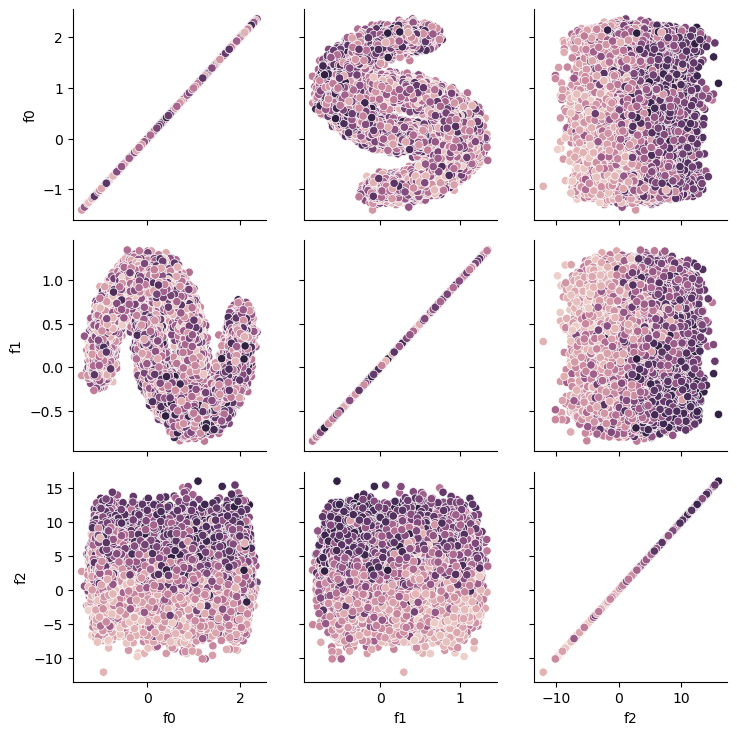

In [19]:
g = sns.PairGrid(df1.drop(['id'], axis=1), hue='product')
g.map(sns.scatterplot)
None

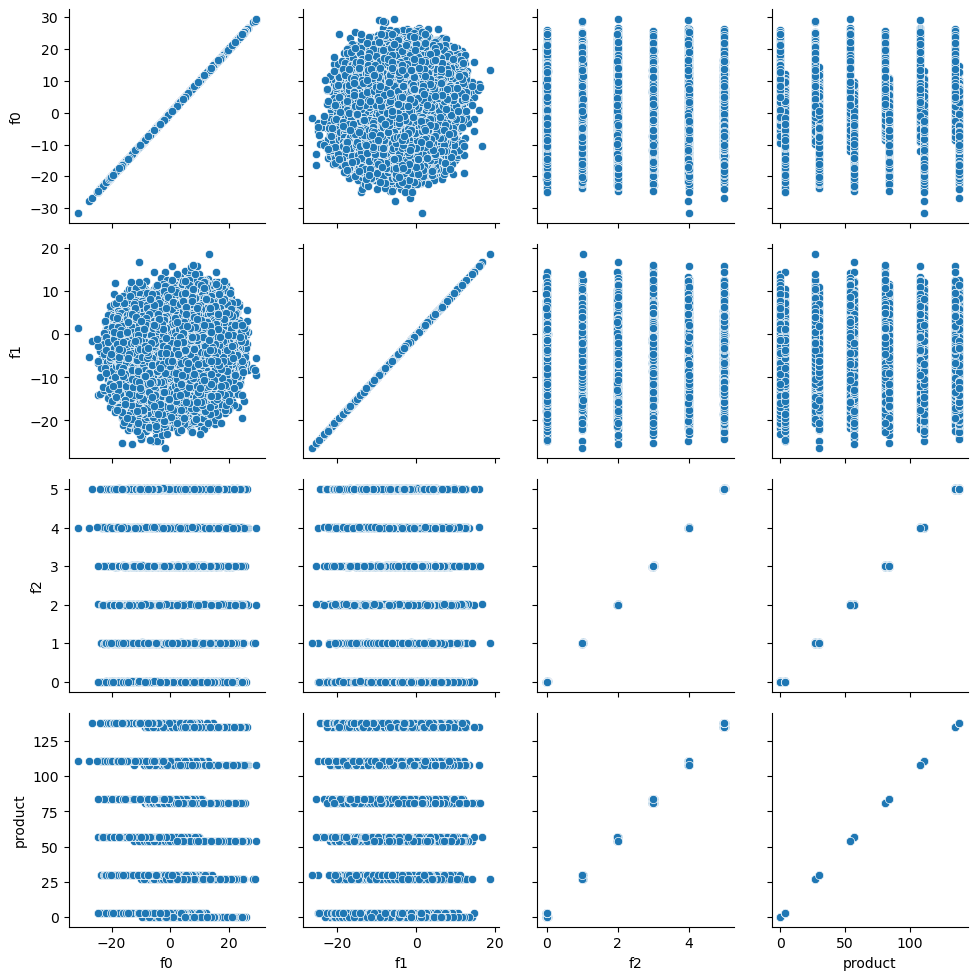

In [20]:
g = sns.PairGrid(df2.drop(['id'], axis=1)) # не стал писать hue, чтобы была видна корреляция между f1 и product
g.map(sns.scatterplot)
None

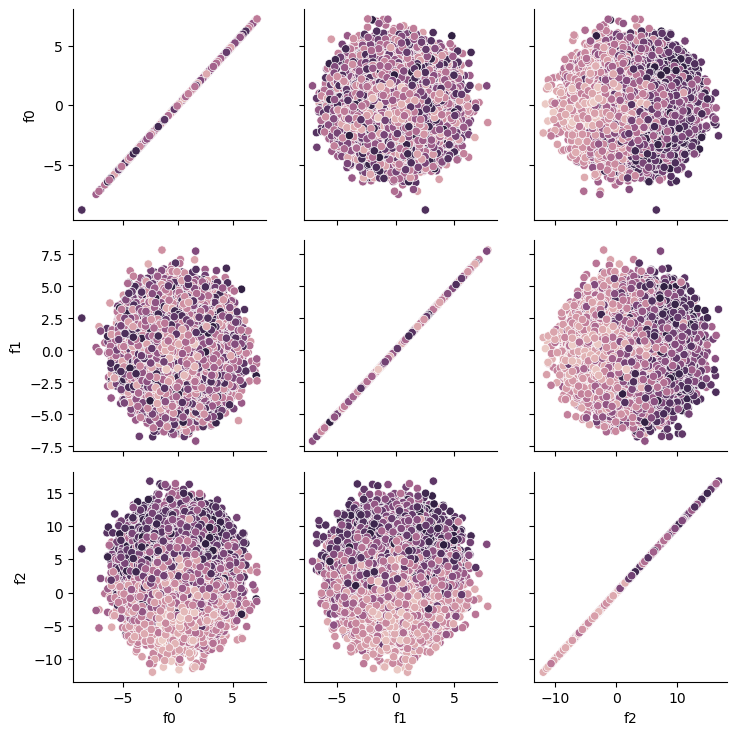

In [21]:
g = sns.PairGrid(df3.drop(['id'], axis=1), hue='product')
g.map(sns.scatterplot)
None

In [22]:
corr = df1.drop(['id'], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm')

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [23]:
corr = df2.drop(['id'], axis=1).corr()
styled_corr = corr.style.background_gradient(cmap='coolwarm')
styled_corr

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


**Заметим, что:**
- `большая линейная зависимости` заметна только во втором регионе между `f2` и `product`;
- между `f0` и `f1` присутствует нелинейная `S-образная корреляция`;
- между `f2` и `f0&f1` присутствует `нелинейная корреляция`.

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**

- Признак `f2` `линейно` коррелирует с `product`. В первом и третьем регионе корреляция средняя (`0.48`), во втором она сильная (`0.99`). Возможно, речь идет об `утечке целевого признака`. Однако учитывая обозначенную в условии значимость признака речи об его удалении не идет;
- В первом и втором регионе лишь `один признак` имеет `нормальное распределение` - `f2` и `f1` соответственно. В третьем регионе `все три характериситики` скважен (f0, f1, f2) `нормально распределены`.
- Признаки, которые нормально распределены, `имеют выбросы`.
- Скважины `первого` и `третьего` региона в среднем дают `на 20 тыс. больше` баррелей нефти, чем скважены `второго` региона
</div>

## Обучение и проверка модели <a id ='4'>  </a>

### Подготовка данных

Удалим данные которые выходят за 25 или 75 квартиль на более, чем 1.5 межквартильного размаха. Для этого воспользуеся следующей функцией:

In [24]:
def remove_outliers_by_column(df, column_name):
    data = df[column_name].values
    q1 = np.percentile(data, 25)  # Первый квартиль
    q3 = np.percentile(data, 75)  # Третий квартиль
    iqr = q3 - q1  # Межквартильный диапазон
    lower_bound = q1 - 1.5 * iqr  # Нижняя граница
    upper_bound = q3 + 1.5 * iqr  # Верхняя граница
    cleaned_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return cleaned_data

#### Таблица 1

In [25]:
df1_cleaned = remove_outliers_by_column(df1, 'f2').reset_index().drop(['index'], axis=1)
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99494 entries, 0 to 99493
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99494 non-null  object 
 1   f0       99494 non-null  float64
 2   f1       99494 non-null  float64
 3   f2       99494 non-null  float64
 4   product  99494 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Таблица 2

In [26]:
df2_cleaned = remove_outliers_by_column(df2, 'f1').reset_index().drop(['index'], axis=1)
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99364 entries, 0 to 99363
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99364 non-null  object 
 1   f0       99364 non-null  float64
 2   f1       99364 non-null  float64
 3   f2       99364 non-null  float64
 4   product  99364 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Таблица 3

In [27]:
df3_cleaned = remove_outliers_by_column(remove_outliers_by_column(remove_outliers_by_column(df3, 'f0'), 'f1'), 'f2').reset_index().drop(['index'], axis=1)
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98003 entries, 0 to 98002
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       98003 non-null  object 
 1   f0       98003 non-null  float64
 2   f1       98003 non-null  float64
 3   f2       98003 non-null  float64
 4   product  98003 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB


Выбросы успешно удалены, данные готовы к обучению. Из df1 было удалено 506 записей, из df2 было удалено 636 записей, из df3 было удалено 1997 записей.

### Обучение и проверка модели для каждого региона

#### Таблица 1

In [28]:
X_df1 = df1_cleaned.reset_index().drop(['index', 'product'], axis=1)
Y_df1 = df1_cleaned.reset_index().drop(['index'], axis=1)['product']


X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_df1, Y_df1, test_size=0.25, random_state=42)

In [29]:
X_train_1 = X_train_1.reset_index().drop(['id', 'index'], axis=1)
X_valid_1_final = X_valid_1.reset_index().drop(['id', 'index'], axis=1)

In [30]:
model_lr1 = LinearRegression()

In [31]:
model_lr1.fit(X_train_1, y_train_1)

LinearRegression()

In [32]:
y_pred_1 = model_lr1.predict(X_valid_1_final)

In [33]:
RMSE = mean_squared_error(y_valid_1, y_pred_1, squared=False)

print(f'Средняя квадратичная ошибка для модели, обученной на данных первого региона равна {round(RMSE, 2)} баррелей')
print(f'Средний запас предсказанного сырья: {round(y_pred_1.mean(), 2)}')

Средняя квадратичная ошибка для модели, обученной на данных первого региона равна 37.82 баррелей
Средний запас предсказанного сырья: 92.35


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Таблица 2

In [34]:
X_df2 = df2_cleaned.reset_index().drop(['index', 'product'], axis=1)
Y_df2 = df2_cleaned.reset_index().drop(['index'], axis=1)['product']


X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_df2, Y_df2, test_size=0.25, random_state=42)

In [35]:
X_train_2 = X_train_2.reset_index().drop(['id', 'index'], axis=1)
X_valid_2_final = X_valid_2.reset_index().drop(['id', 'index'], axis=1)

In [36]:
model_lr2 = LinearRegression()

In [37]:
model_lr2.fit(X_train_2, y_train_2)

LinearRegression()

In [38]:
y_pred_2 = model_lr2.predict(X_valid_2_final)

In [39]:
RMSE = mean_squared_error(y_valid_2, y_pred_2, squared=False)

print(f'Средняя квадратичная ошибка для модели, обученной на данных второго региона равна {round(RMSE, 2)} баррелей')
print(f'Средний запас предсказанного сырья: {round(y_pred_2.mean(), 2)}')

Средняя квадратичная ошибка для модели, обученной на данных второго региона равна 0.89 баррелей
Средний запас предсказанного сырья: 68.55


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Таблица 3

In [40]:
X_df3 = df3_cleaned.reset_index().drop(['index', 'product'], axis=1)
Y_df3 = df3_cleaned.reset_index().drop(['index'], axis=1)['product']


X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_df3, Y_df3, test_size=0.25, random_state=42)

In [41]:
X_train_3 = X_train_3.reset_index().drop(['id', 'index'], axis=1)
X_valid_3_final = X_valid_3.reset_index().drop(['id', 'index'], axis=1)

In [42]:
model_lr3 = LinearRegression()

In [43]:
model_lr3.fit(X_train_3, y_train_3)

LinearRegression()

In [44]:
y_pred_3 = model_lr3.predict(X_valid_3_final)

In [45]:
RMSE = mean_squared_error(y_valid_3, y_pred_3, squared=False)

print(f'Средняя квадратичная ошибка для модели, обученной на данных третьего региона равна {round(RMSE, 2)} баррелей')
print(f'Средний запас предсказанного сырья: {round(y_pred_3.mean(), 2)}')

Средняя квадратичная ошибка для модели, обученной на данных третьего региона равна 40.13 баррелей
Средний запас предсказанного сырья: 94.95


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Анализ

Заметим, что
- Вторая модель предсказывает `наиболее точно`: `RMSE=0.89`;
- Модель для `первого` и `третьего` региона работает хуже: `RMSE=38` и `RMSE=40` при среднепредсказанном равном `92` (истинное среднее равняется `92`и `94` соответственно).

<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**

- `Модель №2` работают `лучше всего` и даёт `наименьшую среднеквадратичную ошибку` (RMSE=`0.89`);
- `Модель №1` и `Модель №3` работает хуже: RMSE=`38` и RMSE=`40` при среднепредсказанном равном `92` (истинное среднее равняется `92`и `94` соответственно).
</div>

## Расчет прибыли и рисков <a id ='5'>  </a>

### Подготовка к расчету прибыли

In [46]:
PROFIT_PER_BARREL = 450_000 # доход с каждой единицы продукта
WELL_DEVELOPMENT_BUDGET = 10_000_000_000 # бюджет на разработку скважин в регионе

При разведке региона выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе равен 10 млрд. рублей. Найдем, сколько приходится на одну скважену:

In [47]:
BUDGET_PER_WELL = WELL_DEVELOPMENT_BUDGET // 200
print(f'На одну скважену бюджет составляет {BUDGET_PER_WELL} рублей')

На одну скважену бюджет составляет 50000000 рублей


Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины:

In [48]:
PAYBACK_POINT = round(BUDGET_PER_WELL / PROFIT_PER_BARREL, 2)
print(f'Новая скважина должна давать не менее {PAYBACK_POINT} тыс. баррелей, чтобы разработка была безубыточной')

Новая скважина должна давать не менее 111.11 тыс. баррелей, чтобы разработка была безубыточной


Сравним полученный объём сырья со средним запасом в каждом регионе:

In [49]:
display(pd.DataFrame({'Регион': ['Регион №1', 'Регион №2', 'Регион №3'], 'Cредний запас сырья': [df1['product'].mean(), df2['product'].mean(), df3['product'].mean()]}))

,Регион,Cредний запас сырья
0,Регион №1,92.500
1,Регион №2,68.825
2,Регион №3,95.000


**Заметим, что:**
- Новая скважина должна давать не менее `111.11 тыс. баррелей`, чтобы разработка была безубыточной;
- Cредний запас сырья в трех регионах `меньше порового значения`, следовательно необходимо тщательно выбирать в них скважены.

### Расчёт прибыли и оценка рисков

Напишем функцию для подсчета прибыли и применим её к выбранным на основании предсказаний ячейкам:

In [50]:
def profit_function(df):
    top_200_wells = df.sort_values(by='predicted_product', ascending=False).head(200)
    return (round(top_200_wells.true.sum() * PROFIT_PER_BARREL, 2) - WELL_DEVELOPMENT_BUDGET)

Выделим в отдельные датафреймы информацию по предсказанным и фактичесим значениям в разрезе трёх регионов:

In [51]:
X_valid_1['true'] = y_valid_1
X_valid_1['predicted_product'] = y_pred_1
X_valid_1.head()

,id,f0,f1,f2,true,predicted_product
74214,hUnak,1.548115,-0.218605,3.395719,79.357613,109.078316
49161,1ROyZ,0.171534,1.005203,5.483607,42.466770,100.544095
93375,IdrJl,0.034506,-0.124148,5.435784,111.101928,115.416606
55348,6ZBWd,-0.827735,0.646864,-2.213015,7.308277,50.379912
47617,qSh75,0.296477,0.825460,2.780219,55.035459,85.538587


In [52]:
X_valid_2['true'] = y_valid_2
X_valid_2['predicted_product'] = y_pred_2
X_valid_2.head()

,id,f0,f1,f2,true,predicted_product
65409,iLvq2,-6.501378,-6.301448,4.005702,110.992147,110.696144
3716,3NLcu,9.069929,-8.961928,0.992453,26.953261,27.283394
69608,yR1os,-6.147815,-10.658120,0.002333,3.179103,2.835925
98107,WBoTL,-9.849918,-8.934452,-0.006919,3.179103,3.085348
61840,lhf6v,11.494322,-6.866062,-0.005478,0.000000,-0.009853


In [53]:
X_valid_3['true'] = y_valid_3
X_valid_3['predicted_product'] = y_pred_3
X_valid_3.head()

,id,f0,f1,f2,true,predicted_product
79535,mcNo6,-0.427258,-3.808161,3.686771,150.204458,102.050314
90577,9MfyH,-0.086035,1.816881,-3.273982,43.133258,61.202239
15056,PSdn5,-1.354601,0.451237,0.539627,80.475095,83.503910
57646,JLzMl,-0.651844,-1.766642,3.592197,136.028618,101.336536
48530,yuFwF,-0.569204,0.209268,2.681097,78.711301,95.877134


Далее применим технику Bootstrap к 1000 выборкам валидационных данных, рассчитаем прибыль и оценим риск. Для этого напишем функицию:

In [54]:
state = np.random.RandomState(12345)
NUMBER_OIL_WELLS = 500

def profit_risk_calculator(df):
    profit_region = []
    risk_region = []
    
    for i in range(1000):
        sample = df.sample(n=NUMBER_OIL_WELLS, replace=True, random_state=state)
        profit_region.append(profit_function(sample))
        risk_region.append((lambda x: 0 if x > 0 else 1)(profit_function(sample)))
    
    risk = round(pd.Series(risk_region).sum() / 1000, 4)
    
    profit_region = pd.Series(profit_region)
    profit_lower = round(profit_region.quantile(.025), 2)
    profit_upper = round(profit_region.quantile(.975), 2)
    
    print(f'С высоков вероятностью прибыль от добычи нефти в регионе лежит между {profit_lower} и {profit_upper} тыс. рублей.')
    print(f'Риск в первом регионе составляет {round(risk*100, 2)}%')

In [55]:
#region #1
profit_risk_calculator(X_valid_1)

С высоков вероятностью прибыль от добычи нефти в регионе лежит между -146392843.69 и 898526291.75 тыс. рублей.
Риск в первом регионе составляет 6.6%


In [56]:
#region #2
profit_risk_calculator(X_valid_2)

С высоков вероятностью прибыль от добычи нефти в регионе лежит между 26673748.57 и 851544610.86 тыс. рублей.
Риск в первом регионе составляет 1.6%


In [57]:
#region #3
profit_risk_calculator(X_valid_3)

С высоков вероятностью прибыль от добычи нефти в регионе лежит между -159640884.05 и 894374880.43 тыс. рублей.
Риск в первом регионе составляет 10.1%


<div class="alert"; style="border-left: 7px solid pink">

**Мини-вывод**

- Если опираться на предсказанные значения валидационных выборок, следует выбрать `83.5%` скважин из `1-го региона` и `16.5%` скважен из `3-го` региона. Ожидаемая прибыль в таком случае составит ~13 млрд. рублей, следовательно речь идет о профиците;
- Однако если брать случайные величины (`Bootstrap`), риски для `второго` региона меньше (1-2%), чем для `первого` (6-7%) и `третьего` (9-10%). Следовательно, стоит выбрать вторую скважену.
</div>

## Общий вывод <a id ='6'>  </a>

В рамках настоящего исследования были проанализованы данные нефтедобывающей компании **с целью** определения того, где бурить новые скважины.

В рамках достижения указанной цели была построена `модель линейной регрессии` для прогноизирования прибыли. Также была произведена оценка рисков `техникой Bootstrap`.

*Перед этим данные были проанализированы, получены следующие выводы:*
- Данные по каждому региону содержат записи о `10000` скважинах;
- Пропуски и дубликаты `отсутствуют`;
- Типы данных в `порядке`;
- `Предположительно` есть выбросы, судя по максимальным значениям;
- В данных по всем трём регионам присутсвут различные по наполнеинию записи по скважинам с `одинаковым уникальным идентификатором`.

*Далее был произведён исследовательский и корреляционный анализ данных и получены следующие выводы:*
- Признак `f2` `линейно` коррелирует с `product`. В первом и третьем регионе корреляция средняя (`0.48`), во втором она сильная (`0.99`). Возможно, речь идет об `утечке целевого признака`. Однако учитывая обозначенную в условии значимость признака речи об его удалении не идет;
- В первом и втором регионе лишь `один признак` имеет `нормальное распределение` - `f2` и `f1` соответственно. В третьем регионе `все три характериситики` скважен (f0, f1, f2) `нормально распределены`;
- Признаки, которые нормально распределены, `имеют выбросы`;
- Скважины `первого` и `третьего` региона в среднем дают `на 20 тыс. больше` баррелей нефти, чем скважены `второго` региона.

*Далее данные были предобработаны для дальнейшего обучения модели:*
- убраны записи которые отклоняются от 25 и 75 перцентиля на более чем 1.5 межквартильного размаха.

*Далее были обучены модели линейной регрессии на данных по трём регионам и получены следующие выводы:*
- `Модель №2` работают `лучше всего` и даёт `наименьшую среднеквадратичную ошибку` (RMSE=`0.89`);
- `Модель №1` и `Модель №3` работает хуже: RMSE=`38` и RMSE=`40` при среднепредсказанном равном `92` (истинное среднее равняется `92`и `94` соответственно).

*Далее был произведён расчет прибыли и оценка рисков, в результате получены следующие выводы:*
- Если опираться на предсказанные значения валидационных выборок, следует выбрать `83.5%` скважин из `1-го региона` и `16.5%` скважен из `3-го` региона. Ожидаемая прибыль в таком случае составит ~13 млрд. рублей, следовательно речь идет о профиците;
- Однако если брать случайные величины (`Bootstrap`), риски для `второго` региона меньше (1-2%), чем для `первого` (6-7%) и `третьего` (7-8%). Следовательно, стоит выбрать вторую скважену.

***С учетом проделанной работы можно сформулировать следующие рекомендации бизнесу:***
1) Выбирать скважены для бурения `во втором регионе`;

2) Применять обученную модель линейной регрессии для оценка объма нефти на местах, в противном случае велик риск получить отрицательную прибыль.